Exploring [Cosgrove et al](http://pubs.rsc.org/en/Content/ArticleLanding/2010/MB/b926287c).
Thank you to Professor Meyer for referring the dataset, as well as the instruction on how to preprocess the data in the following cell :)

In [1]:
import scipy as sp, numpy as np
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt

data = sp.io.loadmat('wk4_Cosgrove-data.mat', squeeze_me=True)['s']

X = data['X'].item() # the untransformed data matrix (66x102)

Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)

phosphoproteins = data['phosphoproteins'].item() # names of phosphoproteins
conditions = data['conditions'].item() # cell array of the 66 conditions
drugList = data['drugList'].item() # description of the drugs used in each of the 66 conditions
drugListToxic = data['drugListToxic'].item() # binary value corresponding to whether drugList[i] is toxic
drugs = data['drugs'].item() # binary matrix mapping which measurements correspond to a drug treatment in drugList
cytokineList = data['cytokineList'].item() # cell array of cytokine treatments
ind4pProtein = data['ind4pProtein'].item() # the column indices corresponding to measurements of the 4 phosphoprotein subset

# printing these out to see what we're dealing with
print(drugList)
print(drugListToxic)

['DMSO' 'CIM' 'RAN' 'LEV' 'TRO' 'BUS' 'NEF' 'ASP' 'NIM' 'CLA' 'TEL']
[0 0 1 0 1 0 1 0 1 1 1]


PLSR on the matrixes X and Y

Notice that we only need four components to explain 90% of the Y variance. This was determined by a for loop in which if the r2y > 90%, the index would be flagged, and a vertical line would be drawn. 

This means that 90% of the variance in the results (LDH release at 48 hours) can be explained by four principal components - with each being orthogonal to the other, in order to explain the max amount of X variance, this is not too surprising.

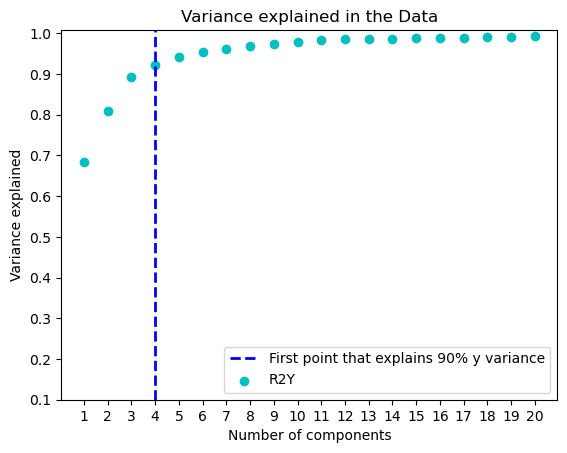

In [2]:
comp_n = np.arange(1, 21)
r2ymatrix = []

for i in comp_n:
    plsr = PLSRegression (n_components=i, scale=True)  #scale true should normalize 
    plsr.fit_transform(X, Y[:,4])
    X_scores = plsr.x_scores_
    
    #Y_pred = pls2.predict(X)

    r2y = plsr.score(X, Y[:,4])
    r2ymatrix.append(r2y)
    
# Use a blueee line to plot the 90% mark
for i, value in enumerate(r2ymatrix):
    if value > 0.9:
        red_line = i+1
        break
plt.axvline(x=red_line, color='b', linestyle='--', linewidth=2, label='First point that explains 90% y variance')


plt.scatter(comp_n, r2ymatrix, color = 'c', label='R2Y')

xaxis_grid = np.arange(1, 21)
plt.xticks(xaxis_grid)
plt.xlabel('Number of components')

yaxis_grid = np.arange(1, 11)
yaxis_grid = yaxis_grid/10
plt.yticks(yaxis_grid)
plt.ylabel('Variance explained')

plt.title('Variance explained in the Data')
plt.legend()
plt.show()

Note that the percent of X variance explained by PLSR should be lower than the percent of X variance explained by PCA, because PLSR aims to maximize the % of COVARIANCE explained. As such, PLSR aims to predict Y given X. 

On the other hand, PCA aims to maximize the amount of X variance explained (neglecting covariance) and as such, because it is entirely focused on explaining X variance, it WILL explain a greater percent of X variance.

#### Figure S2A plot from Cosgrove et al. supplementary information

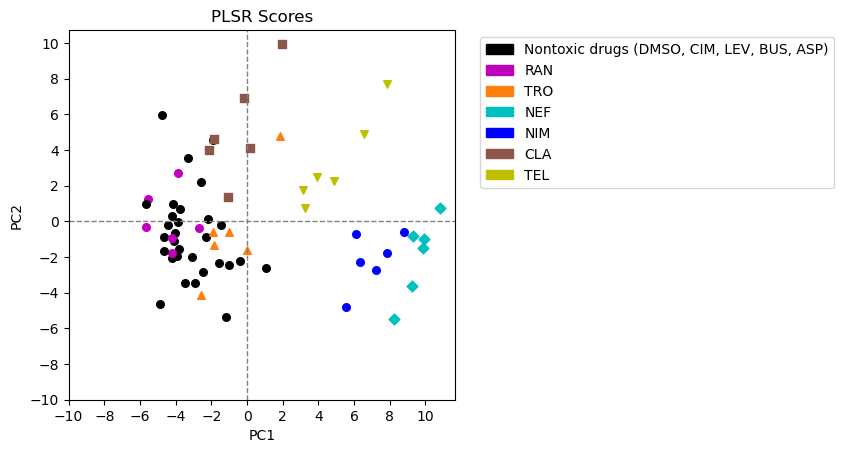

In [3]:
PC1 = (X_scores[:,0])
PC2 = (X_scores[:,1])

# for each patient
for i in range(66):

    for k in range(11):
        # depending on the drug they've taken (ndicated by k =1)
        if drugs[i, k] == 1:
            # if its toxic, special colouring instructions
            if drugListToxic[k] == 1:
                if k == 2:
                    plt.scatter(PC1[i], PC2[i], color = 'm', label = drugList[k], s=30)
                if k == 4:
                    plt.scatter(PC1[i], PC2[i], color = 'tab:orange', label = drugList[k], s=30, marker = '^')
                if k == 6:
                    plt.scatter(PC1[i], PC2[i], color = 'c', label = drugList[k], s=30, marker='D')
                if k == 8:
                    plt.scatter(PC1[i], PC2[i], color = 'b', label = drugList[k], s=30)
                if k == 9:
                    plt.scatter(PC1[i], PC2[i], color = 'tab:brown', label = drugList[k], s=30, marker = 's')
                if k == 10:
                    plt.scatter(PC1[i], PC2[i], color = 'y', label = drugList[k], s=30, marker = 'v')
            if drugListToxic[k] == 0:
               
                plt.scatter(PC1[i], PC2[i], color = 'k', label = drugList[k], edgecolor ='k', s=30)
    
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('PC1')
plt.ylabel('PC2')

axis_grid = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
plt.xticks(axis_grid)
plt.yticks(axis_grid)

from matplotlib.patches import Patch
legend_elements = [
    Patch(color='k', label='Nontoxic drugs (DMSO, CIM, LEV, BUS, ASP)'),
    Patch(color='m', label='RAN'),
    Patch(color='tab:orange', label='TRO'),
    Patch(color='c', label='NEF'),
    Patch(color='b', label='NIM'),
    Patch(color='tab:brown', label='CLA'),
    Patch(color='y', label='TEL'),
]

plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.00, 1))
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
plt.title('PLSR Scores')

plt.show()

Note to the grader: Prof Meyer said that the authors made a mistake with the drug toxicity list, and RAN doesn't need to be plotted. I plotted it anyways because it feels like good practice to go with the data to catch potential flaws in the author's work that need to be highlighted? My choice to colour RAN doesn't affect any of the PCs, just visually a diff colour.

#### Loadings plot

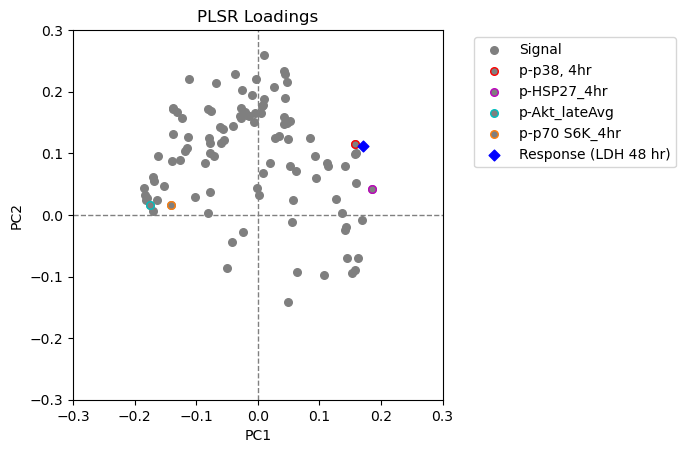

In [4]:
# Answer
yload = plsr.y_loadings_
yload = yload[:,0:2]
PC1y = yload[:,0]
PC2y = yload[:,1]

xload = plsr.x_loadings_
PC1x = xload[:,0]
PC2x = xload[:,1]

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(PC1x, PC2x, color = 'tab:grey', label = 'Signal', s=30)
plt.scatter(PC1x[79], PC2x[79], color = 'tab:grey', edgecolor = 'r', label = 'p-p38, 4hr', s=30)
#plt.annotate('1', (PC1x[79], PC2x[79]), textcoords="offset points", xytext=(5,10), ha='center')
plt.scatter(PC1x[85], PC2x[85], color = 'tab:grey', edgecolor = 'm', label = 'p-HSP27_4hr', s=30)
plt.scatter(PC1x[34], PC2x[34], color = 'tab:grey', edgecolor = 'c', label = 'p-Akt_lateAvg', s=30)
plt.scatter(PC1x[37], PC2x[37], color = 'tab:grey', edgecolor = 'tab:orange', label = 'p-p70 S6K_4hr', s=30)

plt.scatter(PC1y, PC2y, color = 'b', label = 'Response (LDH 48 hr)', s=30, marker = 'D')
plt.gca().set_aspect('equal', adjustable='box')

axis_grid = [-.3, -.2, -.1, 0, .1, .2, .3]
plt.xticks(axis_grid)
plt.yticks(axis_grid)

plt.legend(bbox_to_anchor=(1.65, 1.0))
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
plt.title('PLSR Loadings')

#Used this to find them
# for i in range(102):
#     print(i, phosphoproteins[i])
plt.show()

The loading for the Response is positive in PC1 and PC2. Note that loadings for p-p38 (4 hrs) and p-HSP27 (4hr) are also positive in PC1 and PC2 (notably, pretty far from PC1 = 0), so they should be closely postiively correlated. And even though loadings for p-Akt (late Average) and p-p70 S6K (4hr) are positive in PC2, they are negative in PC1. Since PC1 explains most of the variation, we can expect that they are mostly negatively correlated with the Response.

#### Variance of loadings plot

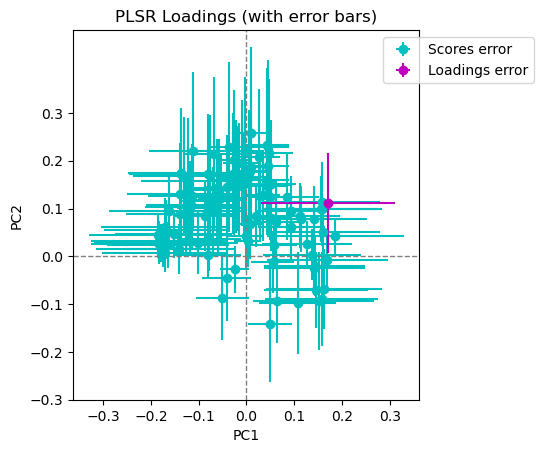

[-0.10003448 -0.13665724 -0.02746406 -0.09991836 -0.13590918 -0.14122336
 -0.1154004  -0.08173782 -0.06152077  0.04289182  0.01711556 -0.11448989
 -0.09332041 -0.02776517 -0.01762947  0.01966603  0.02863342  0.0507829
 -0.0629486  -0.03849723 -0.00098978  0.05003033  0.01826932 -0.0703894
 -0.09281207 -0.10138058  0.07863295 -0.07440504  0.01919607 -0.04466421
  0.00315828 -0.04094364  0.10257046  0.10086398  0.10062055  0.07318751
 -0.08652913  0.06331369  0.09725965  0.09384857  0.10269021  0.07457709
 -0.10631509 -0.0075861  -0.02484396 -0.03551484 -0.02649775 -0.07537984
 -0.08596059 -0.04790663 -0.02896288 -0.00407068 -0.02701224 -0.08357185
 -0.07614915 -0.05950778  0.00520439  0.01219277  0.04802976  0.04739575
 -0.02691286 -0.10779051  0.01387431  0.04345463 -0.05248265 -0.0520981
 -0.05791379  0.01548667  0.02222467 -0.03360481 -0.03487271 -0.05917902
 -0.08263619 -0.04780053 -0.0151498   0.06874204  0.00522082 -0.01864728
 -0.02378731  0.03870141 -0.0894044   0.03759832  0.07

In [5]:
from sklearn.utils import resample
X = data['X'].item() # the untransformed data matrix (66x102)
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
PC1x_rs = np.zeros((500,len(PC1x))) #rows, columns
PC2x_rs = np.zeros((500,len(PC2x)))
PC1y_rs = np.zeros((500,len(PC1y))) #rows, columns
PC2y_rs = np.zeros((500,len(PC2y)))

# function to return PC1x and PC2x
def bootstrap_x(X, Y):
    plsr = PLSRegression(2, scale = True)
    i = np.random.choice(len(X), len(X), replace = True)
    plsr.fit(X[i], Y[i])
    return plsr.x_loadings_[:,0], plsr.x_loadings_[:,1]

# function to return PC1y and PC2y
def bootstrap_y(X, Y):
    plsr = PLSRegression(2, scale = True)
    i = np.random.choice(len(X), len(X), replace = True)
    plsr.fit(X[i], Y[i])
    return plsr.y_loadings_[:,0], plsr.y_loadings_[:,1]

for i in range(500):
    PC1x_rs[i,:], PC2x_rs[i,:] = bootstrap_x(X, Y[:,4])
    PC1y_rs[i,:], PC2y_rs[i,:] = bootstrap_y(X, Y[:,4])
    
xerror_pc1 = np.std(PC1x_rs, axis = 0)
xerror_pc2 = np.std(PC2x_rs, axis = 0)
yerror_pc1 = np.std(PC1y_rs, axis = 0)
yerror_pc2 = np.std(PC2y_rs, axis = 0)

plt.errorbar(PC1x, PC2x, xerr=xerror_pc1, yerr=xerror_pc2, fmt="o", color = 'c', label = 'Scores error')
plt.errorbar(PC1y, PC2y, xerr=yerror_pc1, yerr=yerror_pc2, fmt="o", color = 'm', label = 'Loadings error')
    

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Loadings (with error bars)')
plt.legend(bbox_to_anchor=(1.35, 1.0))
plt.gca().set_aspect('equal', adjustable='box')

axis_grid = [-.3, -.2, -.1, 0, .1, .2, .3]
plt.xticks(axis_grid)
plt.yticks(axis_grid)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)

plt.show()
print(xerror_pc1-xerror_pc2)
print(np.mean(xerror_pc1-xerror_pc2))

#### 4PC model, with model fitness ($R^2$)
I'm calculating R^2 using r2_score, with the inputs being our actual Y values and then our predicted Y values. The function r2_score was imported from scikit, and the documentation says that it returns (1 - residual sum of square / total sum of squares). This is displayed in the next cell. See that $R^2$ is 0.882 :)

In [6]:
from IPython.display import display, Math
equation = r'R^2 = 1 -  \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}'
display(Math(equation))
# equation double-referenced from here: https://miro.medium.com/v2/resize:fit:556/1*JKxx5h_ThVfwqQuMhgBLqQ.png

<IPython.core.display.Math object>

Text(2, 8, 'R^2 = 0.882')

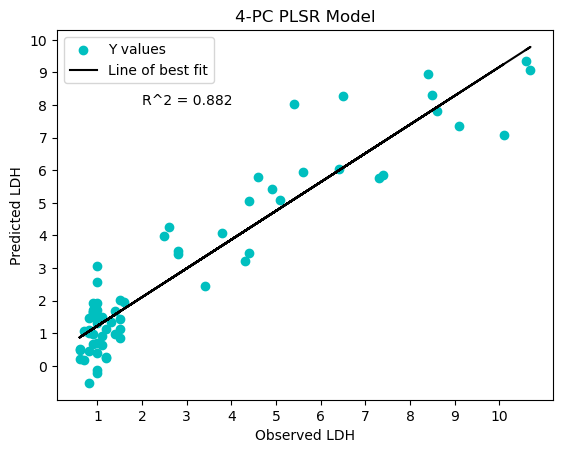

In [7]:
X = data['X'].item() # the untransformed data matrix (66x102)
X = X[:, ind4pProtein]

Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)

plsModel = PLSRegression(n_components=4, scale=True)
plsModel.fit_transform(X,Y[:,4])
yPred = plsModel.predict(X, copy=True)

# Creating figure
fig = plt.figure()
# Adding axes on the figure
ax = fig.add_subplot(111)

ax.scatter(Y[:,4], yPred, color = 'c', label="Y values")
ax.set_xlabel("Observed LDH")
ax.set_ylabel("Predicted LDH")
ax.set_title("4-PC PLSR Model")
axis_grid = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(axis_grid)
plt.yticks(axis_grid)

b, a = np.polyfit(Y[:,4], yPred, 1)
ax.plot(Y[:,4], a + b * Y[:,4], color="k", label="Line of best fit");

ax.legend()

from sklearn.metrics import r2_score
r2 = r2_score(Y[:,4], yPred)
r2 = round(r2, 3)
printr2 = f'R^2 = {r2}'
ax.annotate(printr2, xy = (2, 8))

#### Leave-one-out cross-validation
The $R^2$ value is 0.805. It's important to perform cross-validation because it estimates your model's ability to predict 'new' data. The 'new' data is just some of our current dataset set aside for testing (in the case of LOOCV, one missing piece), but it does the job. However, this means that we will overestimate the prediction error, but that's okay because its better to have a more accurate guess. Main point: when we perform cross-validation, we are not only getting a measurement of how well our model fits our datapoints, but how well it can PREDICT them.

0.8050304842834815


Text(2, 7, 'R^2 = 0.805')

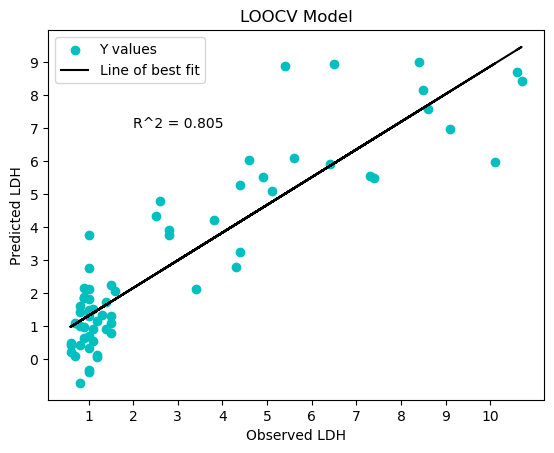

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
X = data['X'].item() # the untransformed data matrix (66x102)
x = X[:, ind4pProtein]
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
y = Y[:,4]

cv = LeaveOneOut()

yPred = cross_val_predict(plsModel, x, y, cv=cv)

# Creating figure
fig = plt.figure()
# Adding axes on the figure
ax = fig.add_subplot(111)

ax.scatter(y, yPred, color = 'c', label="Y values")
ax.set_xlabel("Observed LDH")
ax.set_ylabel("Predicted LDH")
ax.set_title("LOOCV Model")
axis_grid = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(axis_grid)
plt.yticks(axis_grid)

b, a = np.polyfit(y, yPred, 1)
ax.plot(y, a + b * y, color="k", label="Line of best fit");

ax.legend()

from sklearn.metrics import r2_score
r2 = r2_score(y, yPred)
print(r2)
r2 = round(r2, 3)
printr2 = f'R^2 = {r2}'
ax.annotate(printr2, xy = (2, 7))

#### Leave-one-cytokine-out cross-validation

Using LOGO lowers the $R^2$ score when compared to LOOCV, from 0.805 to 0.761. We can also see from the graphs that there is a greater difference in how close the predicted LDH is to the observed LDH.

This makes sense, because instedad of leaving one data pair out at a time, we're leaving out a group of data pairs. LOOCV is the better approach when we have data from all groups and we're using it to predict one particular point, and we are aiming for computational accuracy. However, with smaller datasets, we run the risk for overfitting due to the fact that we're not really using a lot of data for validation - which can cause overfitting easily in more complex models. 

LOGO is better when we're trying to predict a data point from a group we don't have data for. This can be useful when we're trying to determine a model's ability to generalize across different experimental conditions.

0.7608594842496731


Text(2, 7, 'R^2 = 0.761')

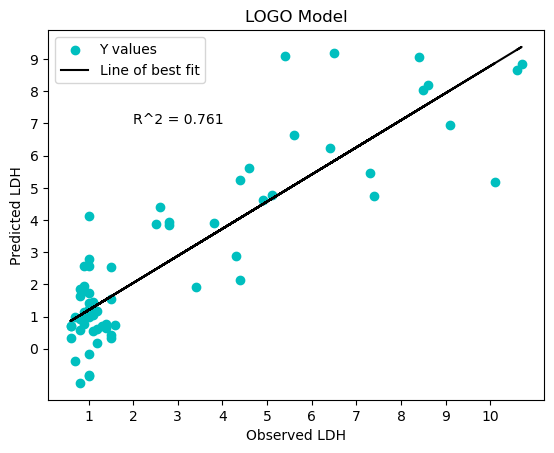

In [9]:
X = data['X'].item() # the untransformed data matrix (66x102)
x = X[:, ind4pProtein]
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
y = Y[:,4]

from sklearn.model_selection import LeaveOneGroupOut
Groups = [i % 6 +1 for i in range(66)]
LOGO = LeaveOneGroupOut().split(x, y, Groups)
LOGO_Predictions = cross_val_predict(plsModel, x, y, cv=LOGO)

# Creating figure
fig = plt.figure()
# Adding axes on the figure
ax = fig.add_subplot(111)

ax.scatter(y, LOGO_Predictions, color = 'c', label="Y values")
ax.set_xlabel("Observed LDH")
ax.set_ylabel("Predicted LDH")
ax.set_title("LOGO Model")
axis_grid = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(axis_grid)
plt.yticks(axis_grid)

b, a = np.polyfit(y, LOGO_Predictions, 1)
ax.plot(y, a + b * y, color="k", label="Line of best fit");

ax.legend()

from sklearn.metrics import r2_score
r2 = r2_score(y, LOGO_Predictions)
print(r2)
r2 = round(r2, 3)
printr2 = f'R^2 = {r2}'
ax.annotate(printr2, xy = (2, 7))